In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from skimage import io


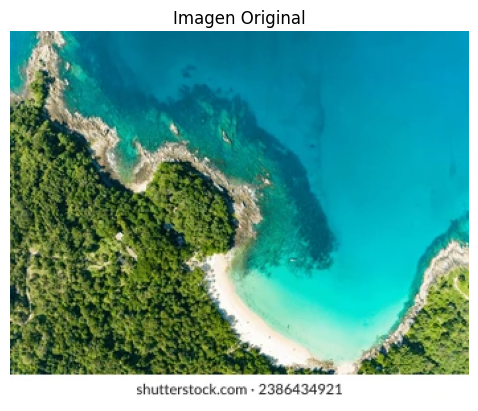

In [ ]:
# Cargar la imagen (reemplaza 'imagen.jpg' con la ruta de tu imagen)
imagen = io.imread('/content/drive/MyDrive/Semestre 9/Visión por Computador/Semana_4/amazing-top-view-beach-aerial-260nw-2386434921.webp')

# Mostrar la imagen original
plt.imshow(imagen)
plt.title('Imagen Original')
plt.axis('off')
plt.show()


In [ ]:
# Redimensionar la imagen a un arreglo de 2D (m * n, 3)
ancho, alto, canales = imagen.shape
imagen_2D = imagen.reshape(ancho * alto, canales)


In [ ]:
# Definir el número de clusters
n_clusters = 3  # Puedes ajustar este valor según lo que desees segmentar

# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(imagen_2D)

# Asignar cada píxel al cluster correspondiente
segmentada_sklearn = kmeans.cluster_centers_[kmeans.labels_]
segmentada_sklearn = segmentada_sklearn.reshape(imagen.shape)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


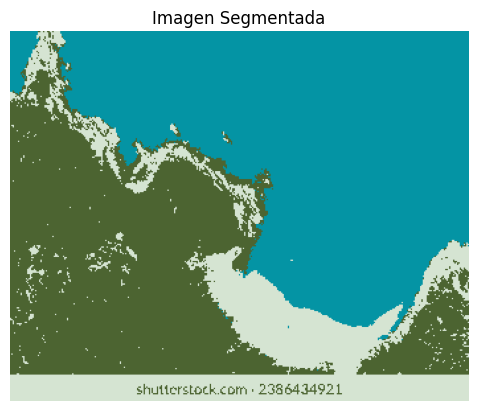

In [ ]:
# Convertir los valores a enteros (0-255) para visualización
segmentada_sklearn = segmentada_sklearn.astype(np.uint8)

# Mostrar la imagen segmentada
plt.imshow(segmentada_sklearn)
plt.title('Imagen Segmentada')
plt.axis('off')
plt.show()


### Comparación con Open CV###


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

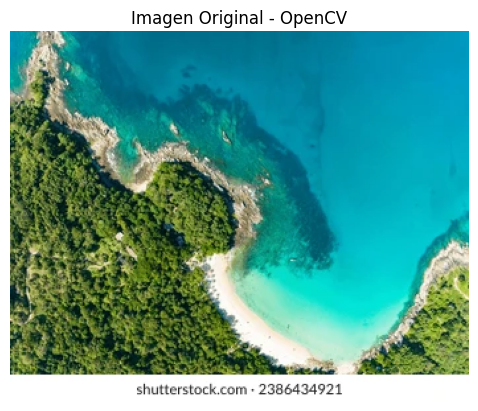

In [ ]:
# Cargar la imagen (reemplaza 'imagen.jpg' con la ruta de tu imagen)
imagen = cv2.imread('/content/drive/MyDrive/Semestre 9/Visión por Computador/Semana_4/amazing-top-view-beach-aerial-260nw-2386434921.webp')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

# Mostrar la imagen original
plt.imshow(imagen)
plt.title('Imagen Original - OpenCV')
plt.axis('off')
plt.show()


In [ ]:
# Redimensionar la imagen a un arreglo de 2D (m * n, 3)
imagen_2D = imagen.reshape((-1, 3))

# Convertir los datos a tipo flotante
imagen_2D = np.float32(imagen_2D)


In [ ]:
# Definir criterios y número de clusters
criterios = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
n_clusters = 3  # Puedes ajustar este valor según lo que desees segmentar

# Aplicar K-Means
_, labels, centers = cv2.kmeans(imagen_2D, n_clusters, None, criterios, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convertir los centros a tipo entero y asignar a la imagen segmentada
centers = np.uint8(centers)
segmentada_opencv = centers[labels.flatten()]
segmentada_opencv = segmentada_opencv.reshape(imagen.shape)

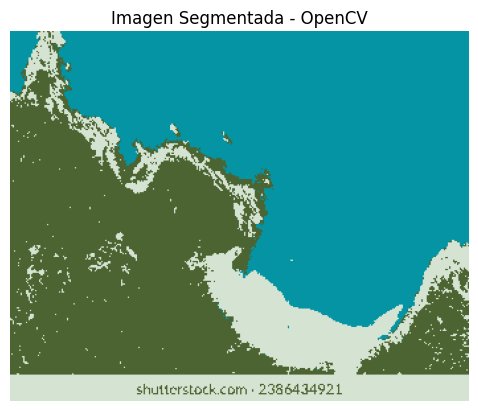

In [ ]:
# Mostrar la imagen segmentada
plt.imshow(segmentada_opencv)
plt.title('Imagen Segmentada - OpenCV')
plt.axis('off')
plt.show()

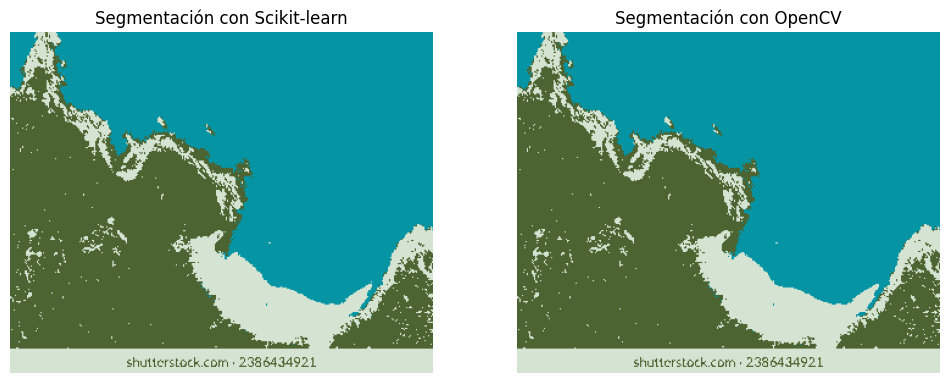

In [ ]:
# Mostrar las dos imágenes segmentadas para comparar
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(segmentada_sklearn)
ax[0].set_title('Segmentación con Scikit-learn')
ax[0].axis('off')

ax[1].imshow(segmentada_opencv)
ax[1].set_title('Segmentación con OpenCV')
ax[1].axis('off')

plt.show()

In [ ]:
# Definir un kernel para las operaciones morfológicas
kernel = np.ones((5,5), np.uint8)

# Aplicar erosión
erosionada = cv2.erode(segmentada_opencv, kernel, iterations=1)

In [ ]:
# Aplicar dilatación
resultado_final = cv2.dilate(erosionada, kernel, iterations=1)

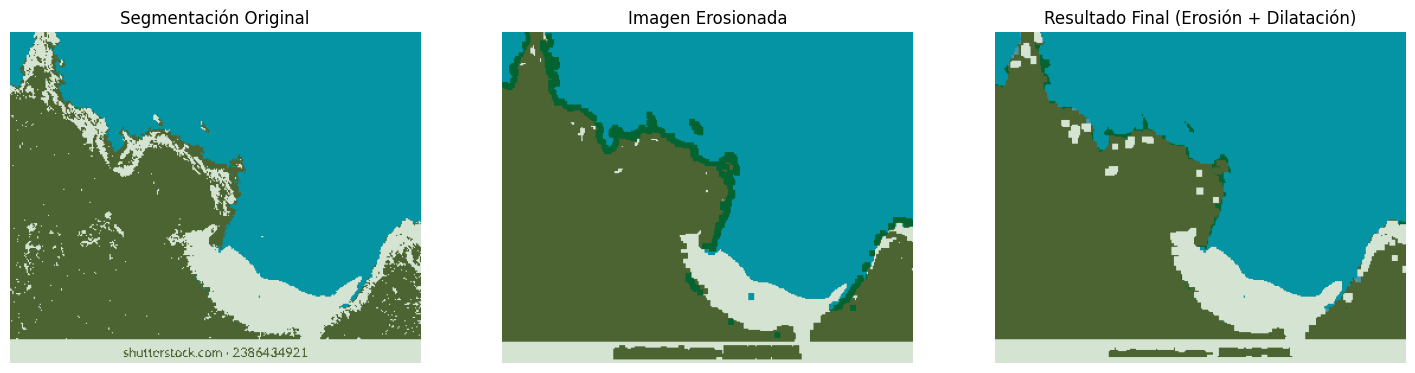

In [ ]:
# Mostrar resultados
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

ax[0].imshow(segmentada_opencv)
ax[0].set_title('Segmentación Original')
ax[0].axis('off')

ax[1].imshow(erosionada)
ax[1].set_title('Imagen Erosionada')
ax[1].axis('off')

ax[2].imshow(resultado_final)
ax[2].set_title('Resultado Final (Erosión + Dilatación)')
ax[2].axis('off')

plt.show()
